# Clasificación utilizando SVM y el dataset digits

In [1]:
#%matplotlib inline
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

## Descripción del Dataset

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

### Verificación del tamaño de las secuencias

In [4]:
digits.target[::100]

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

In [5]:
digits.data.shape

(1797, 64)

In [6]:
digits.target.shape

(1797,)

### Una muestra del Dataset Digits

In [7]:
digits.images[13]

array([[ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.],
       [ 0.,  4., 13.,  8.,  9., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  6., 14., 15.,  3.,  0.],
       [ 0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.],
       [ 0.,  1.,  5.,  6., 13., 16.,  6.,  0.],
       [ 0.,  2., 12., 12., 13., 11.,  0.,  0.]])

### Preparación de los datos para utilizarlos con Scikit-Learn

In [8]:
digits.data[13]

array([ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9.,
       16.,  8.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,  0.,  0.,  0.,
        0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,
        0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6.,
       13., 16.,  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.])

## Visualización de los Datos
### Creación del diagrama

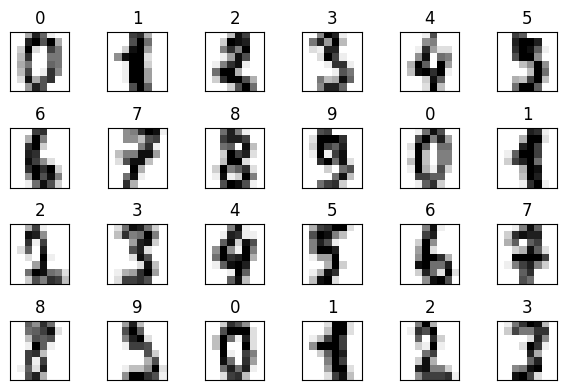

In [9]:
import matplotlib.pyplot as plt

figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

### Displaying Each Image and Removing the Axes Labels 

for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()     

## Dividiendo en dataset en secuencias de Train y Test 

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     digits.data, digits.target, random_state=11)

### Tamaño de las Secuencias de Train y Test

In [11]:
X_train.shape

(1347, 64)

In [12]:
X_test.shape

(450, 64)

## Creación del modelo

In [13]:
#@title Celda 1

## Entrenamiento del Modelo

In [14]:
# Definición del estimador
from sklearn.svm import SVC

#svclassifier = SVC(kernel='poly', degree=8, gamma='auto')
svclassifier = SVC(kernel='rbf', gamma='scale')

svclassifier.fit(X=X_train, y=y_train)

SVC()

## Haciendo predicciones para las clases de Digits

In [15]:
predicted = svclassifier.predict(X=X_test)

expected = y_test

In [16]:
predicted[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

In [17]:
expected[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])

In [18]:
# Listado de predicciones equivocadas
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]

wrong

[(np.int64(5), np.int64(3)),
 (np.int64(9), np.int64(7)),
 (np.int64(7), np.int64(9)),
 (np.int64(7), np.int64(3)),
 (np.int64(8), np.int64(3)),
 (np.int64(1), np.int64(8))]

In [19]:
# Precisión lograda por el clasificador
print(f'{svclassifier.score(X_test, y_test):.2%}')

98.67%


### Matriz  de Confusión 

In [20]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true=expected, y_pred=predicted)

confusion

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 41,  0,  1,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 50,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 44,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 43,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 42]])

### Report de Classificación 

In [21]:
from sklearn.metrics import classification_report

names = [str(digit) for digit in digits.target_names]

print(classification_report(expected, predicted, 
       target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        45
           2       1.00      1.00      1.00        54
           3       1.00      0.93      0.96        44
           4       1.00      1.00      1.00        50
           5       0.97      1.00      0.99        38
           6       1.00      1.00      1.00        42
           7       0.96      0.98      0.97        45
           8       0.98      0.98      0.98        44
           9       0.98      0.98      0.98        43

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



### Visualizar la Matriz de Confusión 

In [22]:
import pandas as pd

confusion_df = pd.DataFrame(confusion, index=range(10),
     columns=range(10))

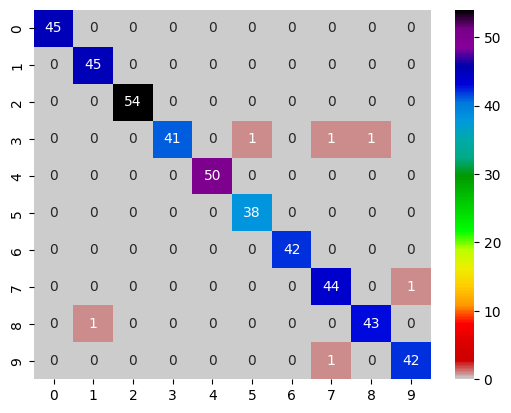

In [23]:
import seaborn as sns

axes = sns.heatmap(confusion_df, annot=True, 
                    cmap='nipy_spectral_r')

## Validación Cruzada

In [24]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, random_state=11, shuffle=True)

### Usar el objeto `KFold`  con la función  `cross_val_score` 

In [25]:
#@title Celda 2

In [26]:
from sklearn.model_selection import cross_val_score

# Aplicar Cross Validation con la función cross_val_score
scores = cross_val_score(estimator=svclassifier, X=digits.data, y=digits.target, cv=kfold)

scores

print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 98.72%


In [27]:
print(f'Accuracy standard deviation: {scores.std():.2%}')

Accuracy standard deviation: 0.79%


## Ejecutando varios modelos para encontrar el mejor

In [28]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB

In [29]:
# Instancias de Clasificadores a evaluar
estimators = {
     'KNeighborsClassifier': KNeighborsClassifier(), 
     'SVC': svclassifier,
     'GaussianNB': GaussianNB()}

for estimator_name, estimator_object in estimators.items():
     kfold = KFold(n_splits=10, random_state=11, shuffle=True)
     scores = cross_val_score(estimator=estimator_object, 
         X=digits.data, y=digits.target, cv=kfold)
     print(f'{estimator_name:>20}: ' + 
           f'mean accuracy={scores.mean():.2%}; ' +
           f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=98.72%; standard deviation=0.75%
                 SVC: mean accuracy=98.72%; standard deviation=0.79%
          GaussianNB: mean accuracy=84.48%; standard deviation=3.47%


In [30]:
##########################################################################
# (C) Copyright 2019 by Deitel & Associates, Inc. and                    #
# Pearson Education, Inc. All Rights Reserved.                           #
#                                                                        #
# DISCLAIMER: The authors and publisher of this book have used their     #
# best efforts in preparing the book. These efforts include the          #
# development, research, and testing of the theories and programs        #
# to determine their effectiveness. The authors and publisher make       #
# no warranty of any kind, expressed or implied, with regard to these    #
# programs or to the documentation contained in these books. The authors #
# and publisher shall not be liable in any event for incidental or       #
# consequential damages in connection with, or arising out of, the       #
# furnishing, performance, or use of these programs.                     #
##########################################################################
